# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 20 (Thursday) 11:00 pm </b> </font>

<font color="blue"> Soham Devdatta Dhodapkar </font>

# Introduction

The primary objective of this assignment is practicing and implementing linear regression algorithm mainly using object oriented concepts of class and functions.<br>
First goal in this assignment is to build a generic model which will pass the code test performed on preliminery data, but will work with custom data sets as well.<br>
Linear regression is implemented using two algorithms namely Least Sqaures and Least Mean Squares (LMS).
In Least Squares method, we calculate the best fit straight line by minimizing sum of square of errors.
In Least Mean Square (LMS), we use a train step function so that the algorithm learns with every step and gives a best fit regression line.


# Data

I have changed the dataset from Assignment 0 as it did not seem very suitable for further work. Although the data set has been changed, my outlook remains the same and hence I am choosing a much similar dataset.
The dataset used in this assignment is NYSE(New York Stock Exchange) data, downloaded from Kaggle datasets.
Here is the link : https://www.kaggle.com/dgawlik/nyse <br>

The primary motive behind choosing this dataset is the capability of application of machine learning to the banking, stocks and investment industry. Careful study and modelling of this data can give very deep insights into the data obtained and examine the events based on the observations. <br>

This data set has 851,264 rows and 6 columns. Fortunately enough, all the columns are of great use while modelling the data for a stock exchange.
The six columns are <B>Symbol,Open,Close,Low,High.Volume</B>
The models applied on this data can be easily scaled according to the data needs.
Open indicates the opening value of a stock.<br>
Close indicates the closing price of the stock for the day.<br>
Low indicates the lower spectrum of the stock value.<br>
High indicates the higher spectrum of the stock value.<br>
Volume indicates the number of stocks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("prices.csv")
print(df)

       symbol        open       close         low        high    volume
0        WLTW  123.430000  125.839996  122.309998  126.250000   2163600
1        WLTW  125.239998  119.980003  119.940002  125.540001   2386400
2        WLTW  116.379997  114.949997  114.930000  119.739998   2489500
3        WLTW  115.480003  116.620003  113.500000  117.440002   2006300
4        WLTW  117.010002  114.970001  114.089996  117.330002   1408600
5        WLTW  115.510002  115.550003  114.500000  116.059998   1098000
6        WLTW  116.459999  112.849998  112.589996  117.070000    949600
7        WLTW  113.510002  114.379997  110.050003  115.029999    785300
8        WLTW  113.330002  112.529999  111.919998  114.879997   1093700
9        WLTW  113.660004  110.379997  109.870003  115.870003   1523500
10       WLTW  109.059998  109.300003  108.320000  111.599998   1653900
11       WLTW  109.730003  110.000000  108.320000  110.580002    944300
12       WLTW  111.879997  111.949997  110.190002  112.949997   

We have imported all the requried libraries and read our csv file and printed the file on the console .

##### Checking the data for NULL or NaN values...

In [2]:
df.isnull()


,symbol,open,close,low,high,volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


##### Using describe function to see the paramers between the values.

In [3]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


#### A co-relation matrix can be found out using corr function to find out connections between various features of our data.

In [4]:
df.corr()

,open,close,low,high,volume
open,1.000000,0.999849,0.999916,0.999930,-0.059950
close,0.999849,1.000000,0.999928,0.999927,-0.060154
low,0.999916,0.999928,1.000000,0.999892,-0.060760
high,0.999930,0.999927,0.999892,1.000000,-0.059452
volume,-0.059950,-0.060154,-0.060760,-0.059452,1.000000


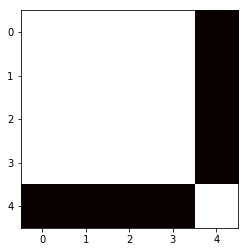

In [6]:
plt.imshow(df.corr(), cmap='hot', interpolation='nearest')
plt.show()

#### We randomly select the company called Google (GOOG), from the dataset to carry out some of the future operations.

In [5]:
dg=df[df.symbol=='GOOG']
dg

,symbol,open,close,low,high,volume
439,GOOG,626.951088,626.751061,624.241073,629.511067,3927000
907,GOOG,627.181073,623.991055,621.541045,627.841071,6031900
1375,GOOG,625.861078,608.261023,606.361042,625.861078,7987100
1843,GOOG,609.401025,594.101005,592.651008,610.001045,12876600
2311,GOOG,592.000997,602.021036,589.110988,603.251034,9483900
2779,GOOG,604.461060,601.111020,594.041028,604.461060,14479800
3247,GOOG,597.651011,590.481036,588.001007,598.161034,9742900
3715,GOOG,576.490965,587.090991,573.900966,588.381027,13041800
4183,GOOG,583.900972,589.850997,582.811024,594.200988,8511900
4651,GOOG,593.341025,580.000965,578.041006,593.561024,10909600


#### Plotting the variables high value and stock volume

[[629.511067 627.841071 625.861078 ... 794.22998  785.929993 782.780029]]
[[3927000 6031900 7987100 ... 1132700  742200 1760200]]


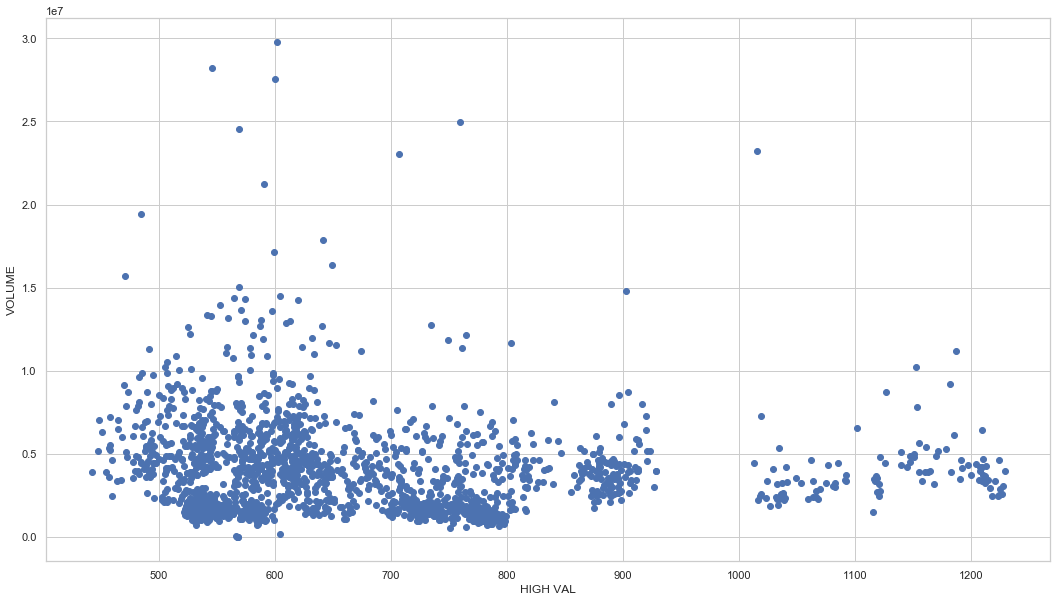

In [77]:
X = dg['high'].values
X = X.reshape(-1,len(X))
print(X)
Y = dg['volume'].values
Y = Y.reshape(-1,len(Y))
print(Y)

plt.xlabel('HIGH VAL')
plt.ylabel('VOLUME')

plt.scatter(X,Y)
#plt.plot(X,Y)

#### Plotting the variables open value and close value


[626.951088 627.181073 625.861078 ... 793.700012 783.330017 782.75    ]
[626.751061 623.991055 608.261023 ... 785.049988 782.789978 771.820007]


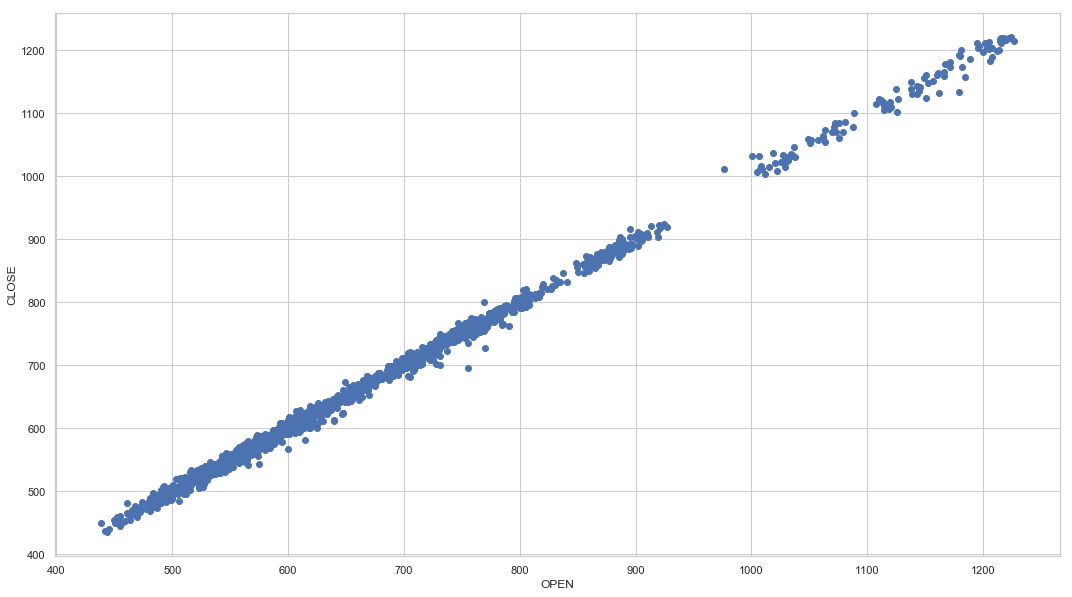

In [78]:
X = dg['open'].values
#X = X.reshape(-1,len(X))
print(X)
Y = dg['close'].values
#Y = Y.reshape(-1,len(Y))
print(Y)

plt.xlabel('OPEN')
plt.ylabel('CLOSE')

plt.scatter(X,Y)

#### Plotting the high and low values

[[629.511067 627.841071 625.861078 ... 794.22998  785.929993 782.780029]]
[[624.241073 621.541045 606.361042 ... 783.200012 778.919983 770.409973]]


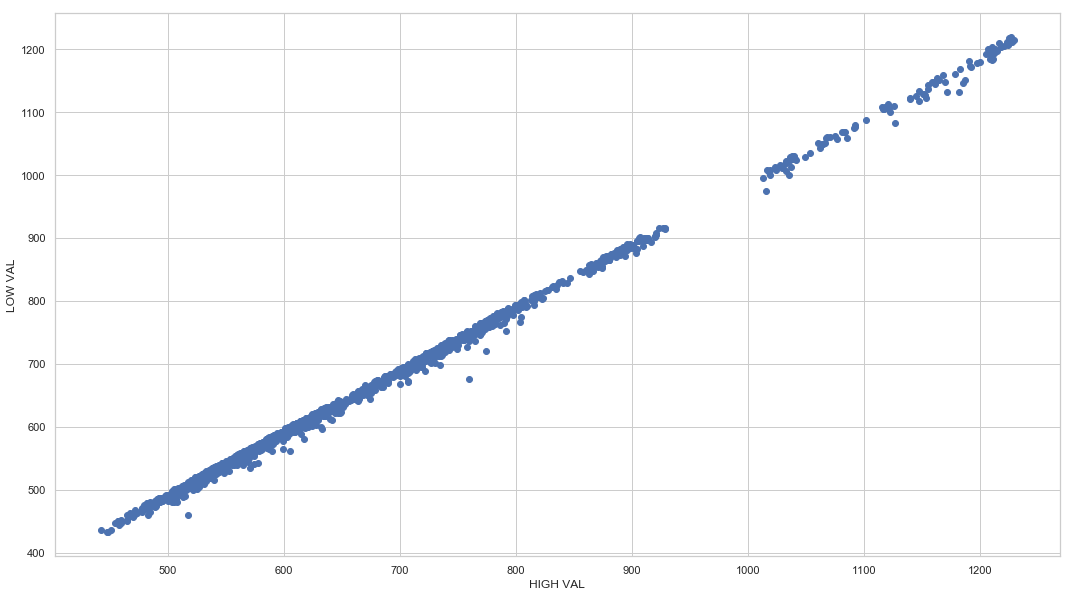

In [79]:
X = dg['high'].values
X = X.reshape(-1,len(X))
print(X)
Y = dg['low'].values
Y = Y.reshape(-1,len(Y))
print(Y)

plt.xlabel('HIGH VAL')
plt.ylabel('LOW VAL')

plt.scatter(X,Y)

We can see some outliers in the plot which might not be very significant but are still outliers which are somewhat interrupting with the line.

#### Calculating high low percent change and open close percent chase <br>
Further, adding the columns of percent changes to the table

In [80]:
dg['HL_PCT'] = (dg['high'] - dg['close']) / dg['close'] * 100.0
dg['PCT_Change'] = (dg['close'] - dg['open']) / dg['close'] * 100.0

dg = dg[['open','close','high','low','HL_PCT','PCT_Change']]
print(dg)

              open       close        high         low    HL_PCT  PCT_Change
439     626.951088  626.751061  629.511067  624.241073  0.440367   -0.031915
907     627.181073  623.991055  627.841071  621.541045  0.616999   -0.511228
1375    625.861078  608.261023  625.861078  606.361042  2.893504   -2.893504
1843    609.401025  594.101005  610.001045  592.651008  2.676319   -2.575323
2311    592.000997  602.021036  603.251034  589.110988  0.204311    1.664400
2779    604.461060  601.111020  604.461060  594.041028  0.557308   -0.557308
3247    597.651011  590.481036  598.161034  588.001007  1.300634   -1.214260
3715    576.490965  587.090991  588.381027  573.900966  0.219734    1.805517
4183    583.900972  589.850997  594.200988  582.811024  0.737473    1.008734
4651    593.341025  580.000965  593.561024  578.041006  2.337937   -2.300007
5119    581.201005  587.620986  590.420997  576.290999  0.476499    1.092538
5587    585.981009  580.411005  585.981009  575.290986  0.959665   -0.959665

In [81]:
dg.columns.values

array(['open', 'close', 'high', 'low', 'HL_PCT', 'PCT_Change'],
      dtype=object)

#### Plotting the values of percent changes added previously in the column

[[0.44036718 0.61699859 2.89350367 ... 1.16935127 0.40113122 1.42002305]]
[[-0.0319149  -0.51122816 -2.89350367 ... -1.10184372 -0.068989
  -1.41613238]]


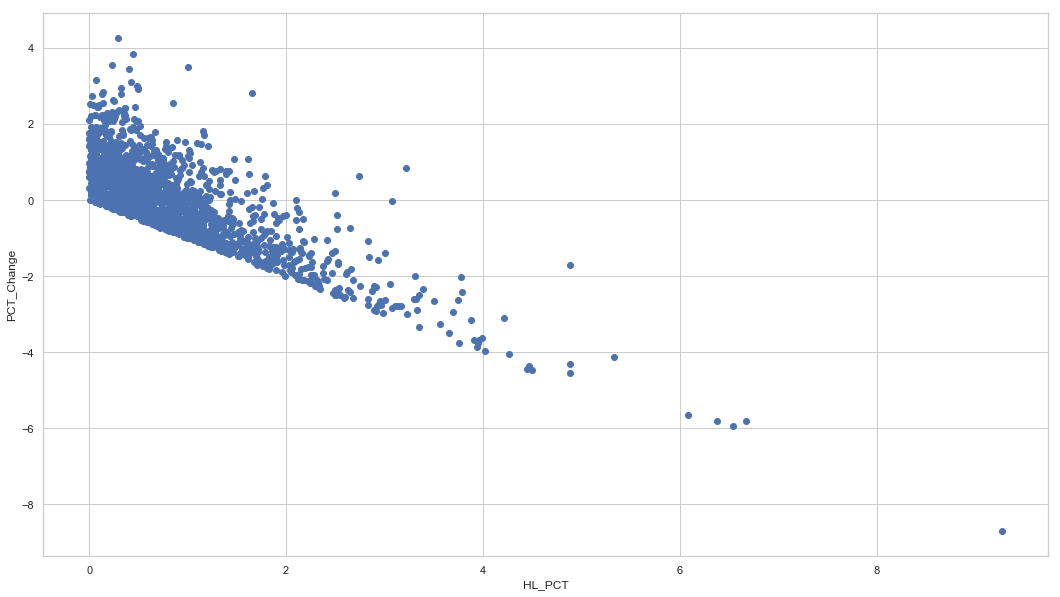

In [82]:
plt.rcParams["figure.figsize"] = [18,10]
X = dg['HL_PCT'].values
X = X.reshape(-1,len(X))
print(X)
Y = dg['PCT_Change'].values
Y = Y.reshape(-1,len(Y))
print(Y)

plt.xlabel('HL_PCT')
plt.ylabel('PCT_Change')

plt.scatter(X,Y)

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description
 


### Super Classs Definition

In [83]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

The above codes define a super class which has abstract methods for train and use in the class BaseModel. Later, in the class LinearModel init constructor and weight function is added along with the function for checking matrix and adding a ones column to the original data.

### Least Squares

In [84]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        X1 = X
        self.w = np.linalg.lstsq(X1.T @ X1, X1.T @ T)[0]

        #pass  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        return np.dot(X,self.w)
        
        
        #pass  ## TODO: replace this with your codes

<B>Least Squares method</B> : We have a class LinearRegress which takes LinearModel as an arguement. Next, the init constructor is called. <br>
In the train function we have first called the add_ones from the super class to add the ones to our data using np.hstack. After this we have performed the least square operation using the formula for least squares.<br>
In the use function, we have basically implemented y = X1 @ w.

### Description of Least Sqaures train and use codes : 
As we need to add a basis column in the input data X, the add_ones function has been called from the class LinearModel. <br>
This has been taken as input X1 after adding the basis column of ones for further calculation of weights.
Standard least sqaure formula has been used to calculate the weight where first, matrix X1 has been transposed and then dot product of this transpose with the target T has been taken. Similarly, the transpose of X1 is also multiplied by the matrix X1 itself.<br>
In the <B>use</B> funtion, the formula "y = X1 @ w" has been implemented.

### Least Mean Squares

In [85]:
import collections # for checking iterable instance
#from itertools import izip

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        
        for x,t in zip(X,T):
            self.train_step(x,t)
        
        #pass  ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        
        if len(x.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
        y = self.w.T @ x - t
        self.w -= self.alpha * (y) * x;
        #print(y)
        
        #pass  ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):      
        if len(X.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)
        x = self.add_ones(X).T
        y = self.w.T @ x
        #print(y.T)
        return y.T
        #pass  ## TODO: replace this with your codes
        

### Description of LMS train, train_step and use codes :
As LMS using batch training, <B> zip </B> has been used to truncation of two given X,T after which the train_step method has been called.
As x is a 1d vector, it is checked if the shape is not greater than 2 and it is reshaped accordingly.
The weight is previously initialised as None so the weights are initiliased using a zero method. Also, the use function is in order to apply the train step function.

### Usage Examples

In [86]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

[[  3.2]
 [  1.2]
 [ -0.8]
 [ -2.8]
 [ -4.8]
 [ -6.8]
 [ -8.8]
 [-10.8]
 [-12.8]
 [-14.8]
 [-16.8]]


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


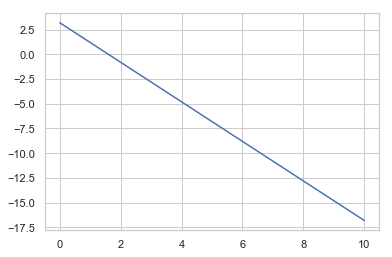

In [87]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

print(ls.use(X))
plt.plot(ls.use(X))

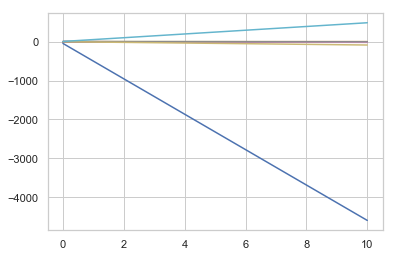

In [88]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    #print(lms.use(X))
    plt.plot(lms.use(X))
plt.show()

[[  2286.78053203]
 [ 23750.98221689]
 [ 45215.18390176]
 [ 66679.38558662]
 [ 88143.58727149]
 [109607.78895635]
 [131071.99064122]
 [152536.19232608]
 [174000.39401095]
 [195464.59569582]
 [216928.79738068]]


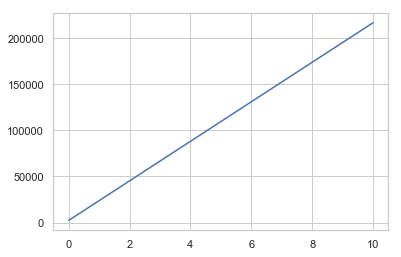

In [89]:
lms.train(X, T)
print(lms.use(X))
plt.plot(lms.use(X))

# Experiments

Apply two methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


##### Simple Linear Regression : 
We have taken means of both the data variables. Later we have taken max and min of X and then we have obtained the coefficients and plotted the line after taking the means of the data.

In [1]:
X = dg['high'].values
Y = dg['low'].values

mean_x = np.mean(X)
mean_y = np.mean(Y)

print(mean_x)
print(mean_y)

m = len(x)
max_x = np.max(X) + 100
min_x = np.min(X) - 100

n = 0
d = 0
for i in range(m):
    n += (X[i] - mean_x) * (Y[i] - mean_y)
    d += (X[i] - mean_x) ** 2
b1 = n / d
b0 = mean_y - (b1 * mean_x)

print(b1,b0)

x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

plt.rcParams["figure.figsize"] = [8,6]
plt.plot(x, y, color='#58b970', label='Regression Line')
plt.label('High v Low')

plt.xlabel('High')
plt.ylabel('Low')
plt.legend()
plt.show()

NameError: name 'dg' is not defined

Plotting the above obtained line with the scatter points.

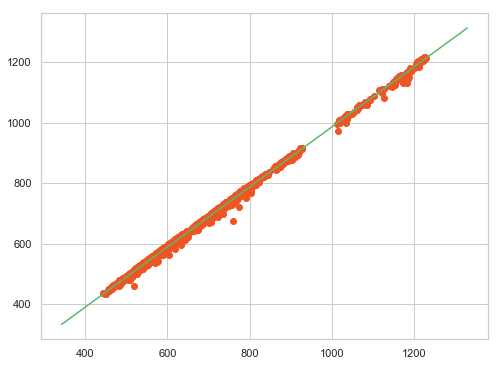

In [95]:
plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='Scatter Points')
plt.show()

Playing with the data even further...

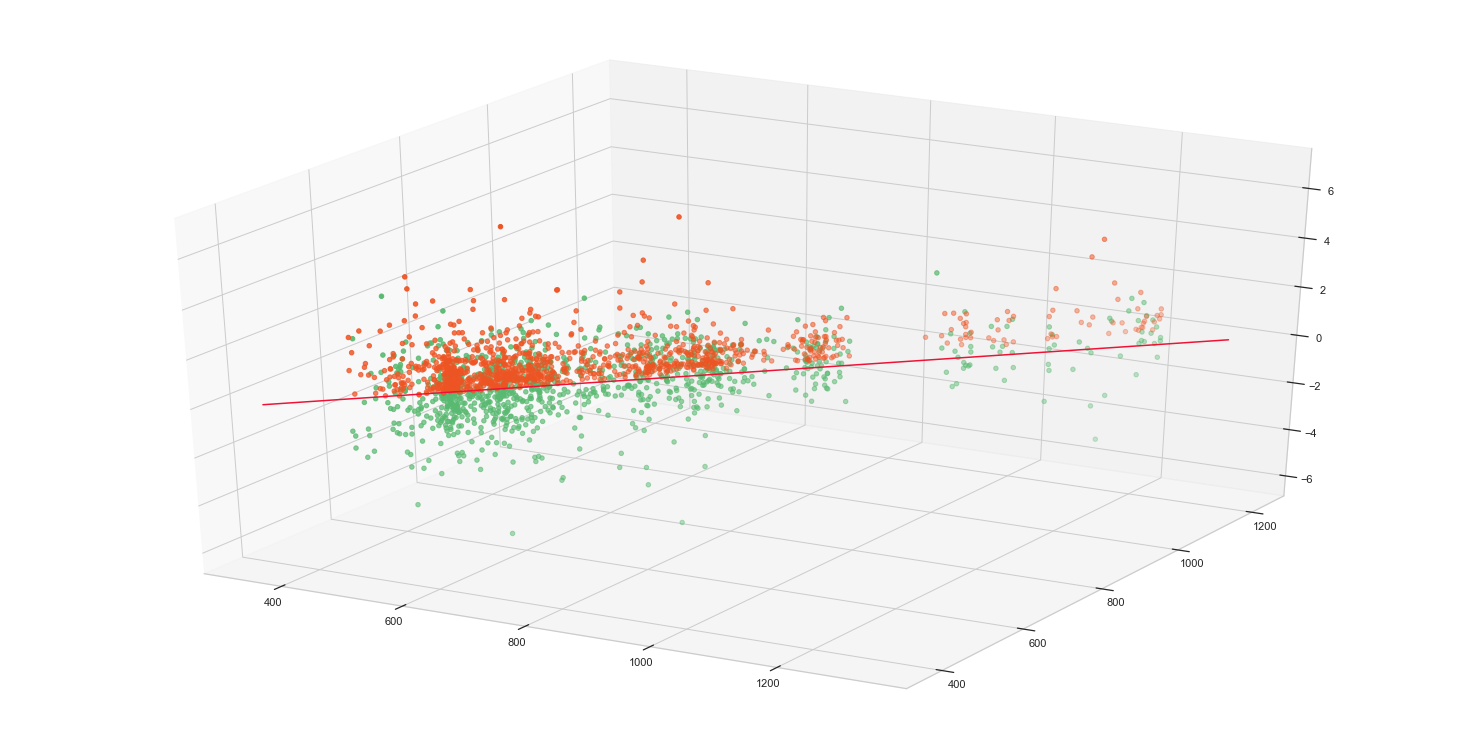

In [93]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (20.0, 10.0)

dh = dg.sample(1000)

X = dh['high'].values
Y = dh['low'].values
Z = dh['PCT_Change'].values
P = dh['open'].values
S = dh['close'].values
H = dh['HL_PCT']



x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, color='#ef1234')
ax.scatter(X, Y, Z, color='#58b970')
ax.scatter(P,S,H, color = '#ef5423')
plt.show()

###### Building the train-test model for our data : 
We have sampled 10000 values from the data. Next we have assigned some variable to our main linear regression function.<br>
We have given X and T as input and target variables. Using the train test split funtion from the sklearn library, we have set the training size as 70% and testing size as 30%.<br>
After this, train function from LinearRegress has been called and both training variables have been passed. After this, similarly, use function has been called for the testing data.

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

datf = df.sample(10000)

linreg = LinearRegress()

X = datf.loc[:,'open'].values.reshape(-1,1)
T = datf.loc[:,'close'].values.reshape(-1,1)
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.3,random_state=42)
linreg.train(X_train,T_train)
a = linreg.use(X_test)
b = linreg.use(T_test)
plt.scatter(X,T)
plt.plot(x,y)
#plt.plot(linreg.use(T_test),linreg.use(X_test))
#plt.scatter(X_test,T_test,color='r')

NameError: name 'df' is not defined

##### Building train test model for our data (LMS) : 
Taking a list of various values of alpha for checking which one gives the best fit, we have a for loop which will loop till the number of values in the list. This is done so that the train step function can be used inside the loop which will directly get called from the train function. After this, similar to the LS, we call the train and test functions from our class of LMS and display the output.

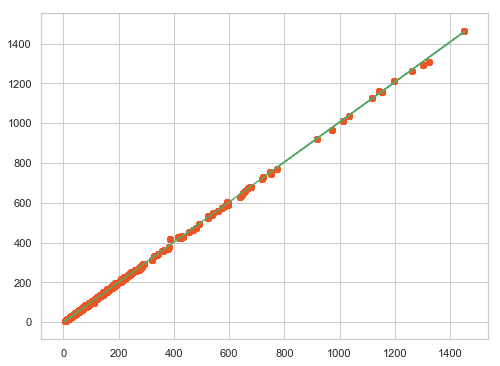

In [101]:
import IPython.display as ipyd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

alpha_val = [1,0.1,0.01,0.001,0.0001]
dat = df.sample(10000)
fig = plt.figure()

for alpha in alpha_val:
    lmsq = LMS(alpha)
    X = dat.loc[:,'open'].values.reshape(-1,1)
    T = dat.loc[:,'close'].values.reshape(-1,1)
    X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.3,random_state=42)
    plt.scatter(X_test,T_test,c='#ef5423')
    lmsq.train(X_train,T_train)
    plt.plot(X_test,lmsq.use(X_test),color='g')
    #plt.show()
    ipyd.clear_output(wait=True)
    ipyd.display(fig)
ipyd.clear_output(wait=True)

# Conclusions

The primary and the probably the most challenging part of the assignment was to understand the already given code. This is because in the industry there is high likelihood that we work on some code which has already been partially been done by someone. This assignment not only provided sufficient technical learning experience but also about modifying existing codes.
Understanding both LS and LMS was a key towards completing the assignment as it was not plain old coding but this implemented object oriented concepts which made it even more challenging to use "self" and base classes and various function calling.
LS seemed easier to implement than LMS, but because of the train_step function in the LMS it seems as a better choice towards increasing accuracy of the model.
As linear model is probably the base of what is going to come next, I will further read about this and polish my statistical concepts related to Machine Learning specifically and try to gain more insights about what more can be done with respect to this.



# References

#### www.towardsscience.com
#### https://machinelearningmastery.com/
#### https://docs.scipy.org/doc/numpy/reference/
#### https://seaborn.pydata.org/api.html
#### http://scikit-learn.org/stable/tutorial/index.html
#### Hands on Machine Learning with Scikit Learn and Tensorflow by Aurélien Géron
#### SciPy Lecture Notes
#### Professor Lee's notes on Linear Model

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    

### Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10 | visualization of results
 | 15 | analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

In [111]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
